<h1>Multiclass Classification</h1>

In this notebook, i will creat a random forest classifier (in a pipeline), to predict the 'thal' variable of a heart disease dataset. This variable to predict, has more than 2 classes, so, after training the model, i will check the ROC values for all the classes.

In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import classification_report
from ipynb.fs.full.funPyModeling import status, freq_tbl, num_vars, cat_vars
from sklearn import set_config

In [194]:
set_config(display='diagram')

<h3>Data Loading</h3>

In [195]:
data_hd = pd.read_csv('data/heart_disease.csv', sep=',')

<h3>Dataset Status</h3>

In [196]:
status(data_hd)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,age,0,0.000000,0,0.000000,41,int64
1,gender,0,0.000000,0,0.000000,2,object
2,chest_pain,0,0.000000,0,0.000000,4,int64
3,resting_blood_pressure,0,0.000000,0,0.000000,50,int64
4,serum_cholestoral,0,0.000000,0,0.000000,152,int64
5,fasting_blood_sugar,0,0.000000,258,0.851485,2,int64
6,resting_electro,0,0.000000,151,0.498350,3,int64
7,max_heart_rate,0,0.000000,0,0.000000,91,int64
8,exer_angina,0,0.000000,204,0.673267,2,int64
9,oldpeak,0,0.000000,99,0.326733,40,float64


There are 4 NaNs in 'num_vessels_flour' and 2 in 'thal'. Both are numerical variables.

In [197]:
freq_tbl(data_hd['thal'])

,thal,frequency,percentage,cumulative_perc
0,3.0,166,0.547855,0.551495
1,7.0,117,0.386139,0.940199
2,6.0,18,0.059406,1.000000


In the variable to predict, the are 3 classes.

<h3>Data Preparation</h3>

In [198]:
data_hd = data_hd[data_hd['thal'].notna()]

Features and target data separation.

In [199]:
x_data_hd = data_hd.drop(['thal'], axis = 1)
y_data_hd = data_hd['thal']

Test set and training set separation.

In [200]:
x_train_hd, x_test_hd, y_train_hd, y_test_hd = train_test_split(x_data_hd, y_data_hd, test_size=0.3)

<h3>Pipeline Creation</h3>

Data preparation

In [201]:
num_transformer = Pipeline(
    steps=[('num_imputer', SimpleImputer(strategy='median'))])

cat_transformer = Pipeline(
    steps=[('cat_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
          ('ohe', OneHotEncoder())])

all_transformer = ColumnTransformer(
    transformers=[
        ('num_t', num_transformer, num_vars(x_train_hd)), ('cat_t', cat_transformer, cat_vars(x_train_hd))])

Models creation

In [202]:
pipe_rf = Pipeline(steps=[('all_transformer', all_transformer),
                          ('model_rf',        RandomForestClassifier(min_samples_leaf=35, max_depth=5, min_samples_split=60))])

Pipeline fitting

In [203]:
pipe_rf.fit(x_train_hd, y_train_hd)

Pipeline(steps=[('all_transformer',
                 ColumnTransformer(transformers=[('num_t',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  Index(['age', 'chest_pain', 'resting_blood_pressure', 'serum_cholestoral',
       'fasting_blood_sugar', 'resting_electro', 'max_heart_rate',
       'exer_angina', 'oldpeak', 'slope', 'num_vessels_flour',
       'heart_disease_severity', 'exter_angina'],
      dtype='object')),
                                                 ('cat_t',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  Index(['gender', 'has_heart_disease'], dtype='object'))])),
                ('model_rf',
                 RandomForestClassifier(max_depth=5, min_samples_leaf=35,
                                        min_samples_split=60))])

<h3>ROC validation</h3>

C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


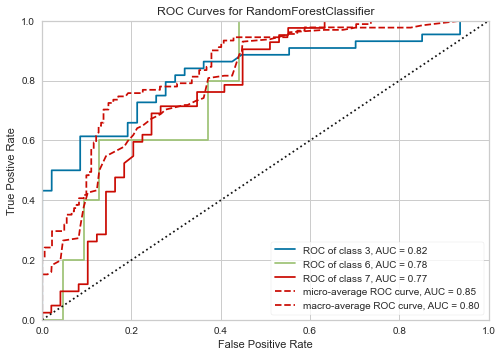

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Postive Rate'>

In [204]:
visualizer = ROCAUC(pipe_rf, classes=["3", "6", "7"])

visualizer.fit(x_train_hd, y_train_hd)        # Fit the training data to the visualizer
visualizer.score(x_test_hd, y_test_hd)        # Evaluate the model on the test data
visualizer.show()  

The ROC values are similar for all the classes, so, the model will have a great performance.

<h3>Classification Report</h3>

In [205]:
y_pred_hd_tr = pipe_rf.predict(x_train_hd)
y_pred_hd_ts = pipe_rf.predict(x_test_hd)

In [206]:
print(classification_report(y_train_hd, y_pred_hd_tr))
print(classification_report(y_test_hd, y_pred_hd_ts))

              precision    recall  f1-score   support

         3.0       0.83      0.83      0.83       122
         6.0       0.00      0.00      0.00        13
         7.0       0.67      0.79      0.72        75

    accuracy                           0.76       210
   macro avg       0.50      0.54      0.52       210
weighted avg       0.72      0.76      0.74       210

              precision    recall  f1-score   support

         3.0       0.71      0.80      0.75        44
         6.0       0.00      0.00      0.00         5
         7.0       0.69      0.69      0.69        42

    accuracy                           0.70        91
   macro avg       0.47      0.50      0.48        91
weighted avg       0.66      0.70      0.68        91



C:\Users\Tec\Anaconda3\envs\PythonCPU\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
